In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [ ]:
paolatrain=pd.read_csv('titanic-train.csv')
paolatest=pd.read_csv('titanic-test.csv')

paolatrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


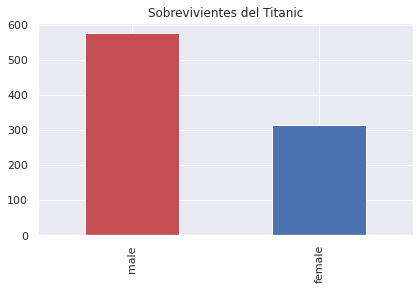

In [ ]:
paolatrain.Sex.value_counts().plot(kind='bar',color=['r','b','w'])
plt.tight_layout()
plt.title('Sobrevivientes del Titanic', y=1.1)
plt.show()


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
encoder_sex = label_encoder.fit_transform(paolatrain['Sex']) 
paolatrain.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
paolatrain['Age']= paolatrain['Age'].fillna(paolatrain['Age'].median())
paolatrain['Embarked']=paolatrain['Embarked'].fillna('S')

train_predictors = paolatrain.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)


In [ ]:
train_predictors = paolatrain.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [ ]:
train_predictors

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
categorical_cols= [cname for cname in train_predictors.columns if 
                   train_predictors[cname].nunique()<10 and
                   train_predictors[cname].dtype == 'object']
categorical_cols

['Sex', 'Embarked']

In [ ]:
numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64','float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
numerical_cols= [cname for cname in train_predictors.columns if train_predictors[cname].dtype in ['int64','float64'] ]

In [ ]:
my_cols=categorical_cols + numerical_cols
train_predictors = paolatrain[my_cols]
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.0,0,0,13.0000
887,female,S,1,19.0,0,0,30.0000
888,female,S,3,28.0,1,2,23.4500
889,male,C,1,26.0,0,0,30.0000


In [ ]:
dummy_encoded_train_predictors =pd.get_dummies(train_predictors)
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
paolatrain['Pclass'].value_counts().sort_index(ascending = True)

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [ ]:
paolatrain.sort_index(ascending = False, axis = 1)

,Ticket,Survived,SibSp,Sex,Pclass,PassengerId,Parch,Name,Fare,Embarked,Cabin,Age
0,A/5 21171,0,1,male,3,1,0,"Braund, Mr. Owen Harris",7.2500,S,NaN,22.0
1,PC 17599,1,1,female,1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,C,C85,38.0
2,STON/O2. 3101282,1,0,female,3,3,0,"Heikkinen, Miss. Laina",7.9250,S,NaN,26.0
3,113803,1,1,female,1,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,S,C123,35.0
4,373450,0,0,male,3,5,0,"Allen, Mr. William Henry",8.0500,S,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,211536,0,0,male,2,887,0,"Montvila, Rev. Juozas",13.0000,S,NaN,27.0
887,112053,1,0,female,1,888,0,"Graham, Miss. Margaret Edith",30.0000,S,B42,19.0
888,W./C. 6607,0,1,female,3,889,2,"Johnston, Miss. Catherine Helen ""Carrie""",23.4500,S,NaN,28.0
889,111369,1,0,male,1,890,0,"Behr, Mr. Karl Howell",30.0000,C,C148,26.0


In [ ]:
paolatrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
'''Tenemos el target como variable predictora'''
y_target = paolatrain['Survived'].values
x_feautures_one=dummy_encoded_train_predictors.values
# Los datos de x_feautures son los datos que obtuvimos de dummies

In [ ]:
x_train, x_validation , y_train , y_validation = train_test_split(x_feautures_one, y_target, test_size =.25,random_state=1)

In [ ]:
# creamos nuestro arbol con tree one_of
# entrenamos con el segundo
tree_one=tree.DecisionTreeClassifier()
tree_one=tree_one.fit(x_feautures_one,y_target)
# colocamos las vriables de entrenamento
# y evaluamos que tan cercano a 100 está

In [ ]:
tree_one_accuracy=round(tree_one.score(x_feautures_one , y_target),4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.9798


In [ ]:
'''Vamos a crear una visualización del árbol de decisión, así como crearemos un archivo png'''

'Vamos a crear una visualización del árbol de decisión'

In [ ]:
#  '''generar archtipo png'''
from io import StringIO
from IPython.display import Image,display
# '''permite generar los caminos que tnemos'''
import pydotplus
# '''salida que nos permite generar un archivo de nuestro código'''
out=StringIO() 
# '''vamos a crear  una graficación'''
tree.export_graphviz(tree_one,out_file = out )
# '''vamos a generar cada una de las ramas que tenemos y lo hacemos
# mediante esta libreia pydotplus y cada una de las secciones las generamos a travez de esto
# con valores como el aprendizaje de nuestro arbol'''
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True

https://drive.google.com/file/d/1uFCSG_-56j7GgOnwdzSjJw_BZ4tBCrMV/view?usp=share_link